<a href="https://colab.research.google.com/github/Sanyukta-Saha/Sanyukta/blob/ML-demo/Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt
import numpy as np

In [7]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [9]:


model = models.Sequential([
    Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9038 - loss: 0.8940 - val_accuracy: 0.9823 - val_loss: 0.0544
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9821 - loss: 0.0570 - val_accuracy: 0.9805 - val_loss: 0.0568
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9871 - loss: 0.0408 - val_accuracy: 0.9835 - val_loss: 0.0510
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9879 - loss: 0.0387 - val_accuracy: 0.9849 - val_loss: 0.0581
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9911 - loss: 0.0295 - val_accuracy: 0.9845 - val_loss: 0.0591


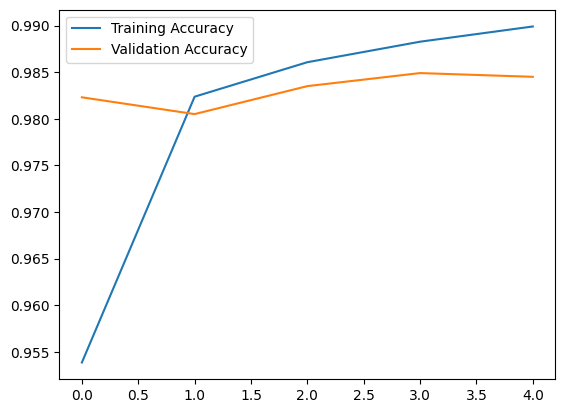

In [12]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


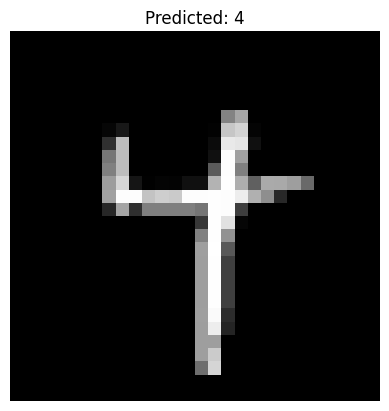

In [14]:
import random
idx = random.randint(0, len(X_test))  # Random test sample
test_img = X_test[idx].reshape(1, 28, 28, 1)

prediction = model.predict(test_img)
predicted_digit = np.argmax(prediction)

plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_digit}")
plt.axis("off")
plt.show()